In [2]:
import pandas as pd
df=pd.read_csv('afterPP_dataset.csv')

In [3]:
df

,Reviews
0,كان لي تجربه اكثر من راءعه اليوم في هذا الفرع ...
1,اسوء خدمه شركه اتصالات علي المستوي العربي كله ...
2,اشكر الموظفه ضيء علي تعاملها ورقيها وخدمتها لي...
3,اسوا نت في العالم عانيت مليون مرررررا منهم رفع...
4,الفرع جدا ممتاز واشكر الاخوات الموظفات علي رحا...
...,...
382,التذكره ايش صار عليها محد فيكم تكرم تواصل معي ...
383,قويه
384,انترنت لا محدود سرعه ميقا زين السعوديه
385,سرعه عاليه ميجا ال زين يارب وماخاب من قال يارب


In [3]:
df.dtypes

Reviews    object
dtype: object

In [4]:
df.dropna(inplace=True)

In [5]:
df_train= pd.read_csv('Arabic Sentiment Analysis Dataset - SS2030.csv')
# #drop Unnamed: 0
# df_train.drop(columns=['Unnamed: 0'],inplace=True)
df_train

,text,Sentiment
0,حقوق المرأة 💚💚💚 https://t.co/Mzf90Ta5g1,1
1,RT @___IHAVENOIDEA: حقوق المرأة في الإسلام. ht...,1
2,RT @saud_talep: Retweeted لجنة التنمية بشبرا (...,1
3,RT @MojKsa: حقوق المرأة التي تضمنها لها وزارة ...,1
4,RT @abm112211: ولي امر الزوجة او ولي الزوجة او...,1
...,...,...
4247,#غرد_بحبك_لمحمد_بن_سلمان ❤️,1
4248,#غرد_بحبك_لمحمد_بن_سلمان \n محمدبن سلمان احبه ...,1
4249,#غرد_بحبك_لمحمد_بن_سلمان \n الله يحفظك يا ذخر ...,1
4250,#غرد_بحبك_لمحمد_بن_سلمان \n \n الله يحفظه ويحم...,1


In [41]:
import pandas as pd
from langdetect import detect
import emoji
import re

# Sample dataframe creation (replace this with your actual dataframe)
data = {'text': ["Hello world! 😊 #fun #learning @someone", "Python is awesome! 🐍🔥 @pythondev"]}
df_train = pd.DataFrame(data)

# Detect language and encoding
def detect_language(text):
    try:
        return detect(text)
    except:
        return "Unknown"

df_train['language'] = df_train['text'].apply(detect_language)

# Calculate average tweet length
df_train['tweet_length'] = df_train['text'].apply(len)
average_tweet_length = df_train['tweet_length'].mean()

# Count number of hashtags
df_train['hashtags'] = df_train['text'].apply(lambda x: len(re.findall(r"#(\w+)", x)))

# Count mentions
df_train['mentions'] = df_train['text'].apply(lambda x: len(re.findall(r"@(\w+)", x)))

# Count emojis
df_train['emojis'] = df_train['text'].apply(lambda x: emoji.emoji_count(x))

# Results
print("Average Tweet Length:", average_tweet_length)
print("Total Number of Hashtags:", df_train['hashtags'].sum())
print("Total Number of Mentions:", df_train['mentions'].sum())
print("Total Number of Emojis:", df_train['emojis'].sum())
print(df_train[['language', 'tweet_length', 'hashtags', 'mentions', 'emojis']])


Average Tweet Length: 35.0
Total Number of Hashtags: 2
Total Number of Mentions: 2
Total Number of Emojis: 3
  language  tweet_length  hashtags  mentions  emojis
0       en            38         2         1       1
1       en            32         0         1       2


In [6]:
#number of positive and negative reviews
df_train['Sentiment'].value_counts()

Sentiment
1    2436
0    1816
Name: count, dtype: int64

In [7]:
#find data types
df_train.dtypes

text         object
Sentiment     int64
dtype: object

In [6]:
import aranorm
df_train['text']=df_train['text'].apply(aranorm.normalize_tweet)
df_train

,text,Sentiment
0,حقوق المراه يوجدرابط,1
1,حقوق المراه في الاسلام يوجدرابط,1
2,لجنه التنميه بشبرا ما زال التسجيل مستمر في دور...,1
3,حقوق المراه التي تضمنها لها وزاره العدل يوجدرابط,1
4,ولي امر الزوجه او ولي الزوجه او ولي المراه من ...,1
...,...,...
4247,غرد بحبك لمحمد بن سلمان,1
4248,غرد بحبك لمحمد بن سلمان محمدبن سلمان احبه الله...,1
4249,غرد بحبك لمحمد بن سلمان الله يحفظك يا ذخر الوط...,1
4250,غرد بحبك لمحمد بن سلمان الله يحفظه ويحميه ويقو...,1


In [7]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Assuming you have NLTK downloaded and Arabic stopwords installed
# If not, you can install them using:
# import nltk
# nltk.download('stopwords')
# nltk.download('punkt')

In [8]:
import numpy as np
import pandas as pd
from numba import njit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Load your dataset (assuming you have it in a DataFrame format)
# Replace the following line with code to load your dataset
# df_train = pd.read_csv('your_dataset.csv')
# df_train.head()

# Define maximum sequence length and vocabulary size
max_len = 300
vocab_size = 10000

# Define a list of Arabic stopwords outside of the Numba-compiled function
arabic_stopwords = list(set(stopwords.words('arabic')))

# Tokenize Arabic text using NLTK's word_tokenize
# You can further customize this tokenizer as needed
def tokenize_text(text):
    return word_tokenize(text)

df_train['tokenized_text'] = df_train['text'].apply(tokenize_text)

In [9]:
df_train

,text,Sentiment,tokenized_text
0,حقوق المراه يوجدرابط,1,"[حقوق, المراه, يوجدرابط]"
1,حقوق المراه في الاسلام يوجدرابط,1,"[حقوق, المراه, في, الاسلام, يوجدرابط]"
2,لجنه التنميه بشبرا ما زال التسجيل مستمر في دور...,1,"[لجنه, التنميه, بشبرا, ما, زال, التسجيل, مستمر..."
3,حقوق المراه التي تضمنها لها وزاره العدل يوجدرابط,1,"[حقوق, المراه, التي, تضمنها, لها, وزاره, العدل..."
4,ولي امر الزوجه او ولي الزوجه او ولي المراه من ...,1,"[ولي, امر, الزوجه, او, ولي, الزوجه, او, ولي, ا..."
...,...,...,...
4247,غرد بحبك لمحمد بن سلمان,1,"[غرد, بحبك, لمحمد, بن, سلمان]"
4248,غرد بحبك لمحمد بن سلمان محمدبن سلمان احبه الله...,1,"[غرد, بحبك, لمحمد, بن, سلمان, محمدبن, سلمان, ا..."
4249,غرد بحبك لمحمد بن سلمان الله يحفظك يا ذخر الوط...,1,"[غرد, بحبك, لمحمد, بن, سلمان, الله, يحفظك, يا,..."
4250,غرد بحبك لمحمد بن سلمان الله يحفظه ويحميه ويقو...,1,"[غرد, بحبك, لمحمد, بن, سلمان, الله, يحفظه, ويح..."


In [10]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Tokenize the text
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df_train['tokenized_text'])
sequences = tokenizer.texts_to_sequences(df_train['tokenized_text'])

# Pad the sequences
data_padded = pad_sequences(sequences, maxlen=max_len)

# Encode the labels
label_encoder = LabelEncoder()
data_labels = label_encoder.fit_transform(df_train['Sentiment'])
data_labels = to_categorical(data_labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_padded, data_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


## Using LSTM 

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense

# LSTMmodel parameters
embedding_dim = 64
lstm_units = 128

# Build the LSTMmodel
LSTMmodel = Sequential()
LSTMmodel.add(Embedding(vocab_size, embedding_dim))
LSTMmodel.add(LSTM(lstm_units))
LSTMmodel.add(Dense(2, activation='sigmoid'))

# Compile the LSTMmodel
LSTMmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTMmodel
history = LSTMmodel.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# Evaluate the LSTMmodel
loss, accuracy = LSTMmodel.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - accuracy: 0.6358 - loss: 0.6203 - val_accuracy: 0.7680 - val_loss: 0.4554
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.9034 - loss: 0.2732 - val_accuracy: 0.8150 - val_loss: 0.3817
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - accuracy: 0.9486 - loss: 0.3015 - val_accuracy: 0.8708 - val_loss: 0.3227
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 0.9891 - loss: 0.0453 - val_accuracy: 0.8722 - val_loss: 0.3541
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.9979 - loss: 0.0158 - val_accuracy: 0.8708 - val_loss: 0.4083
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.9990 - loss: 0.0094 - val_accuracy: 0.8752 - val_loss: 0.4731
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 0.8840 - val_loss: 0.5117
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 1.0000 - loss: 0.0026 - val_accuracy: 0.8767 - v

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import tensorflow as tf
from keras_tuner import HyperModel

class MyModel(HyperModel):
    def __init__(self, vocab_size):
        self.vocab_size = vocab_size
    
    def build(self, hp):
        model = Sequential()
        model.add(Embedding(
            input_dim=self.vocab_size, 
            output_dim=hp.Int('embedding_dim', min_value=32, max_value=128, step=32)))
        model.add(LSTM(
            units=hp.Int('lstm_units', min_value=64, max_value=256, step=64)))
        model.add(Dense(2, activation='sigmoid'))
        
        model.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model


In [21]:
from keras_tuner.tuners import Hyperband

vocab_size = 10000  # example vocab size, adjust as per your dataset

tuner = Hyperband(
    MyModel(vocab_size),
    objective='val_accuracy',
    max_epochs=10,
    directory='my_dir',
    project_name='keras_tuner_demo'
)

# Define early stopping callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Start the search for the best hyperparameter configuration
tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]



Trial 22 Complete [00h 00m 44s]
val_accuracy: 0.8722466826438904

Best val_accuracy So Far: 0.8854625821113586
Total elapsed time: 00h 07m 51s


In [22]:
print(f"""
The hyperparameter search is complete. The optimal embedding dimension is {best_hps.get('embedding_dim')} 
and the optimal number of LSTM units is {best_hps.get('lstm_units')}.
""")



The hyperparameter search is complete. The optimal embedding dimension is 64 
and the optimal number of LSTM units is 64.



## Rebuliding after hyperparameter tuning

In [11]:
# Model parameters
embedding_dim = 128
lstm_units = 64

# Build the LSTMmodel1
LSTMmodel1 = Sequential()
LSTMmodel1.add(Embedding(vocab_size, embedding_dim))
LSTMmodel1.add(LSTM(lstm_units))
LSTMmodel1.add(Dense(2, activation='sigmoid'))

# Compile the LSTMmodel1
LSTMmodel1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the LSTMmodel1
history = LSTMmodel1.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# Evaluate the LSTMmodel1
loss, accuracy = LSTMmodel1.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')


Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - accuracy: 0.6764 - loss: 0.5822 - val_accuracy: 0.8458 - val_loss: 0.3491
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 0.9387 - loss: 0.1645 - val_accuracy: 0.8649 - val_loss: 0.3286
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.9890 - loss: 0.0345 - val_accuracy: 0.8855 - val_loss: 0.4127
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.9991 - loss: 0.0097 - val_accuracy: 0.8869 - val_loss: 0.5227
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.9998 - loss: 0.0027 - val_accuracy: 0.8825 - val_loss: 0.5835
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 104ms/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.8767 - val_loss: 0.6680
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 1.0000 - loss: 8.5779e-04 - val_accuracy: 0.8737 - val_loss: 0.7137
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - accuracy: 1.0000 - loss: 5.0328e-04 - val_acc

## Using SimpleRNN

In [16]:
# Build the modelRNN
modelRNN = Sequential()
modelRNN.add(Embedding(vocab_size, embedding_dim))
modelRNN.add(SimpleRNN(64, return_sequences=False))
modelRNN.add(Dense(2, activation='sigmoid'))  # Assuming 3 classes

# Compile the modelRNN
modelRNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the modelRNN
history = modelRNN.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))

# Evaluate the modelRNN
loss, accuracy = modelRNN.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6229 - loss: 0.6201 - val_accuracy: 0.7283 - val_loss: 0.4887
Epoch 2/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9527 - loss: 0.1771 - val_accuracy: 0.7856 - val_loss: 0.4093
Epoch 3/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9685 - loss: 0.1006 - val_accuracy: 0.7959 - val_loss: 0.4787
Epoch 4/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9988 - loss: 0.0112 - val_accuracy: 0.8150 - val_loss: 0.4849
Epoch 5/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9994 - loss: 0.0067 - val_accuracy: 0.8135 - val_loss: 0.5145
Epoch 6/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 0.8179 - val_loss: 0.5284
Epoch 7/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 0.8106 - val_loss: 0.5498
Epoch 8/10
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.8179 - v

## Using transformer

In [17]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline

model_name = "CAMeL-Lab/bert-base-arabic-camelbert-da-sentiment"  # Replace with the specific model you find
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

nlp = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer, truncation=True, padding=True, max_length=512)

# Function to apply sentiment analysis
def analyze_sentiment(text):
    result = nlp(text)
    return result[0]['label']

# Apply the function to your DataFrame
df_train['T-Sentiment'] = df_train['text'].apply(analyze_sentiment)

In [18]:
df_train['T-Sentiment'].value_counts()

T-Sentiment
negative    2661
positive    1233
neutral      358
Name: count, dtype: int64

In [19]:
df_train

,text,Sentiment,tokenized_text,T-Sentiment
0,حقوق المراه يوجدرابط,1,"[حقوق, المراه, يوجدرابط]",neutral
1,حقوق المراه في الاسلام يوجدرابط,1,"[حقوق, المراه, في, الاسلام, يوجدرابط]",neutral
2,لجنه التنميه بشبرا ما زال التسجيل مستمر في دور...,1,"[لجنه, التنميه, بشبرا, ما, زال, التسجيل, مستمر...",neutral
3,حقوق المراه التي تضمنها لها وزاره العدل يوجدرابط,1,"[حقوق, المراه, التي, تضمنها, لها, وزاره, العدل...",neutral
4,ولي امر الزوجه او ولي الزوجه او ولي المراه من ...,1,"[ولي, امر, الزوجه, او, ولي, الزوجه, او, ولي, ا...",negative
...,...,...,...,...
4247,غرد بحبك لمحمد بن سلمان,1,"[غرد, بحبك, لمحمد, بن, سلمان]",positive
4248,غرد بحبك لمحمد بن سلمان محمدبن سلمان احبه الله...,1,"[غرد, بحبك, لمحمد, بن, سلمان, محمدبن, سلمان, ا...",positive
4249,غرد بحبك لمحمد بن سلمان الله يحفظك يا ذخر الوط...,1,"[غرد, بحبك, لمحمد, بن, سلمان, الله, يحفظك, يا,...",positive
4250,غرد بحبك لمحمد بن سلمان الله يحفظه ويحميه ويقو...,1,"[غرد, بحبك, لمحمد, بن, سلمان, الله, يحفظه, ويح...",positive


In [20]:
#combine neutral and positive
df_train['T-Sentiment'].replace('neutral','positive',inplace=True)

In [21]:
df_train['T-Sentiment'].value_counts()

T-Sentiment
negative    2661
positive    1591
Name: count, dtype: int64

In [22]:
df_train

,text,Sentiment,tokenized_text,T-Sentiment
0,حقوق المراه يوجدرابط,1,"[حقوق, المراه, يوجدرابط]",positive
1,حقوق المراه في الاسلام يوجدرابط,1,"[حقوق, المراه, في, الاسلام, يوجدرابط]",positive
2,لجنه التنميه بشبرا ما زال التسجيل مستمر في دور...,1,"[لجنه, التنميه, بشبرا, ما, زال, التسجيل, مستمر...",positive
3,حقوق المراه التي تضمنها لها وزاره العدل يوجدرابط,1,"[حقوق, المراه, التي, تضمنها, لها, وزاره, العدل...",positive
4,ولي امر الزوجه او ولي الزوجه او ولي المراه من ...,1,"[ولي, امر, الزوجه, او, ولي, الزوجه, او, ولي, ا...",negative
...,...,...,...,...
4247,غرد بحبك لمحمد بن سلمان,1,"[غرد, بحبك, لمحمد, بن, سلمان]",positive
4248,غرد بحبك لمحمد بن سلمان محمدبن سلمان احبه الله...,1,"[غرد, بحبك, لمحمد, بن, سلمان, محمدبن, سلمان, ا...",positive
4249,غرد بحبك لمحمد بن سلمان الله يحفظك يا ذخر الوط...,1,"[غرد, بحبك, لمحمد, بن, سلمان, الله, يحفظك, يا,...",positive
4250,غرد بحبك لمحمد بن سلمان الله يحفظه ويحميه ويقو...,1,"[غرد, بحبك, لمحمد, بن, سلمان, الله, يحفظه, ويح...",positive


In [23]:
#map T-Sentiment to 0 and 1
df_train['T-Sentiment'] = df_train['T-Sentiment'].map({'positive': 1, 'negative': 0})

In [24]:
# Measure accuracy
accuracy = (df_train['Sentiment'] == df_train['T-Sentiment']).mean()
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 72.22%


## LSTM is the best model so 

In [12]:
# label the unlabeled data
df['tokenized_text'] = df['Reviews'].apply(tokenize_text)
# Tokenize the text
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(df['tokenized_text'])
sequences = tokenizer.texts_to_sequences(df['tokenized_text'])

# Pad the sequences
data_padded = pad_sequences(sequences, maxlen=max_len)
# Predict labels for the unlabeled dataset
predicted_labels = LSTMmodel1.predict(data_padded)

import numpy as np

# Assuming your model's output is sigmoid and you have two classes
# Convert probabilities to class labels
predicted_class_indices = np.argmax(predicted_labels, axis=1)

# If you need the labels as '0' or '1'
predicted_class_labels = ["0" if label == 0 else "1" for label in predicted_class_indices]

# Now, predicted_class_labels contains the class labels ('0' or '1') for each sample
df['Predicted_Labels'] = predicted_class_labels


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [13]:
df

,Reviews,tokenized_text,Predicted_Labels
0,كان لي تجربه اكثر من راءعه اليوم في هذا الفرع ...,"[كان, لي, تجربه, اكثر, من, راءعه, اليوم, في, ه...",1
1,اسوء خدمه شركه اتصالات علي المستوي العربي كله ...,"[اسوء, خدمه, شركه, اتصالات, علي, المستوي, العر...",0
2,اشكر الموظفه ضيء علي تعاملها ورقيها وخدمتها لي...,"[اشكر, الموظفه, ضيء, علي, تعاملها, ورقيها, وخد...",0
3,اسوا نت في العالم عانيت مليون مرررررا منهم رفع...,"[اسوا, نت, في, العالم, عانيت, مليون, مرررررا, ...",0
4,الفرع جدا ممتاز واشكر الاخوات الموظفات علي رحا...,"[الفرع, جدا, ممتاز, واشكر, الاخوات, الموظفات, ...",1
...,...,...,...
382,التذكره ايش صار عليها محد فيكم تكرم تواصل معي ...,"[التذكره, ايش, صار, عليها, محد, فيكم, تكرم, تو...",0
383,قويه,[قويه],0
384,انترنت لا محدود سرعه ميقا زين السعوديه,"[انترنت, لا, محدود, سرعه, ميقا, زين, السعوديه]",1
385,سرعه عاليه ميجا ال زين يارب وماخاب من قال يارب,"[سرعه, عاليه, ميجا, ال, زين, يارب, وماخاب, من,...",1


<Axes: xlabel='Predicted_Labels', ylabel='count'>

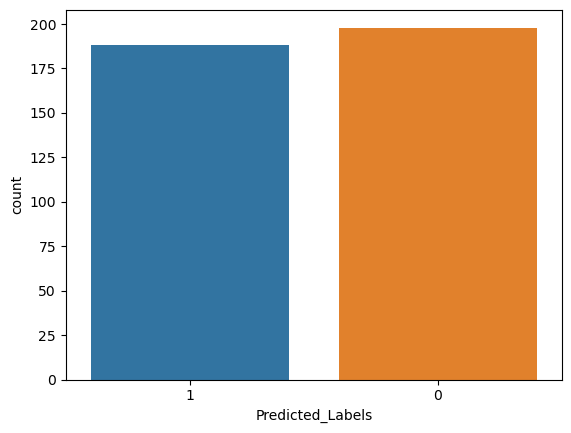

In [42]:
import seaborn as sns
sns.countplot(x='Predicted_Labels', data=df)

In [43]:
from nltk.tokenize import RegexpTokenizer
df_for_tokenization = df.copy()
tokenizer = RegexpTokenizer(r'\w+')
df_for_tokenization["Reviews"] = df_for_tokenization["Reviews"].apply(tokenizer.tokenize)
stopwords_list = stopwords.words('arabic')
listToStr = ' '.join([str(elem) for elem in stopwords_list])
df_for_tokenization["Reviews"] = df_for_tokenization["Reviews"].apply(lambda x: [item for item in x if item not in listToStr])
df_for_tokenization

,Reviews,tokenized_text,Predicted_Labels
0,"[تجربه, اكثر, راءعه, اليوم, الفرع, الخدمه, الم...","[كان, لي, تجربه, اكثر, من, راءعه, اليوم, في, ه...",1
1,"[اسوء, خدمه, شركه, اتصالات, المستوي, العربي, ك...","[اسوء, خدمه, شركه, اتصالات, علي, المستوي, العر...",0
2,"[اشكر, الموظفه, ضيء, تعاملها, ورقيها, وخدمتها,...","[اشكر, الموظفه, ضيء, علي, تعاملها, ورقيها, وخد...",0
3,"[اسوا, العالم, عانيت, مليون, مرررررا, منهم, رف...","[اسوا, نت, في, العالم, عانيت, مليون, مرررررا, ...",0
4,"[الفرع, جدا, ممتاز, واشكر, الاخوات, الموظفات, ...","[الفرع, جدا, ممتاز, واشكر, الاخوات, الموظفات, ...",1
...,...,...,...
382,"[التذكره, ايش, عليها, محد, فيكم, تكرم, تواصل, ...","[التذكره, ايش, صار, عليها, محد, فيكم, تكرم, تو...",0
383,[قويه],[قويه],0
384,"[انترنت, محدود, سرعه, ميقا, زين, السعوديه]","[انترنت, لا, محدود, سرعه, ميقا, زين, السعوديه]",1
385,"[سرعه, عاليه, ميجا, زين, يارب, وماخاب, قال, يارب]","[سرعه, عاليه, ميجا, ال, زين, يارب, وماخاب, من,...",1


In [48]:
#map 1 to positive and 0 to negative
df_for_tokenization['Predicted_Labels'] = df_for_tokenization['Predicted_Labels'].map({'1': 'positive', '0': 'negative'})

In [53]:
import matplotlib.pyplot as plt
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display
from nltk import ngrams
import seaborn as sns
import pandas as pd

def get_most_common_ngrams_by_class(sentiment_df, sentiment, ngram_size=2, n=10):
    """Get the most common n-grams for each class."""
    classes = sentiment_df[sentiment].unique()
    common_ngrams = {}

    for cls in classes:
        # Create a list of all words in the reviews for the current class
        words = [word for sublist in sentiment_df[sentiment_df[sentiment] == cls]['Reviews'] for word in sublist]
        # Generate n-grams
        n_grams = ngrams(words, ngram_size)
        # Count and get the most common n-grams
        most_common = Counter(n_grams).most_common(n)
        common_ngrams[cls] = most_common

    return common_ngrams

def plot_most_common_ngrams(common_ngrams):
    """Plot the most common n-grams for each class, applying Arabic reshaping."""
    # Create a figure with subplots
    fig, axes = plt.subplots(len(common_ngrams), 1, figsize=(10, 15), squeeze=False)
    fig.tight_layout(pad=8.0)
    
    for i, (cls, ngrams) in enumerate(common_ngrams.items()):
        phrases, frequencies = zip(*ngrams)
        # Convert tuple n-grams to string and reshape for correct Arabic rendering
        reshaped_phrases = [' '.join(ngram) for ngram in phrases]
        reshaped_phrases = [get_display(arabic_reshaper.reshape(phrase)) for phrase in reshaped_phrases]
        
        ax = sns.barplot(x=list(frequencies), y=reshaped_phrases, ax=axes[i, 0])
        ax.set_title(f'Most Common Phrases in {get_display(arabic_reshaper.reshape(cls))}', fontsize=16)
        
        # Set font for both title and y-tick labels to a readable Arabic font
        ax.title.set_fontname('sans')
        for label in ax.get_yticklabels():
            label.set_fontname('SF Arabic')
        
    plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


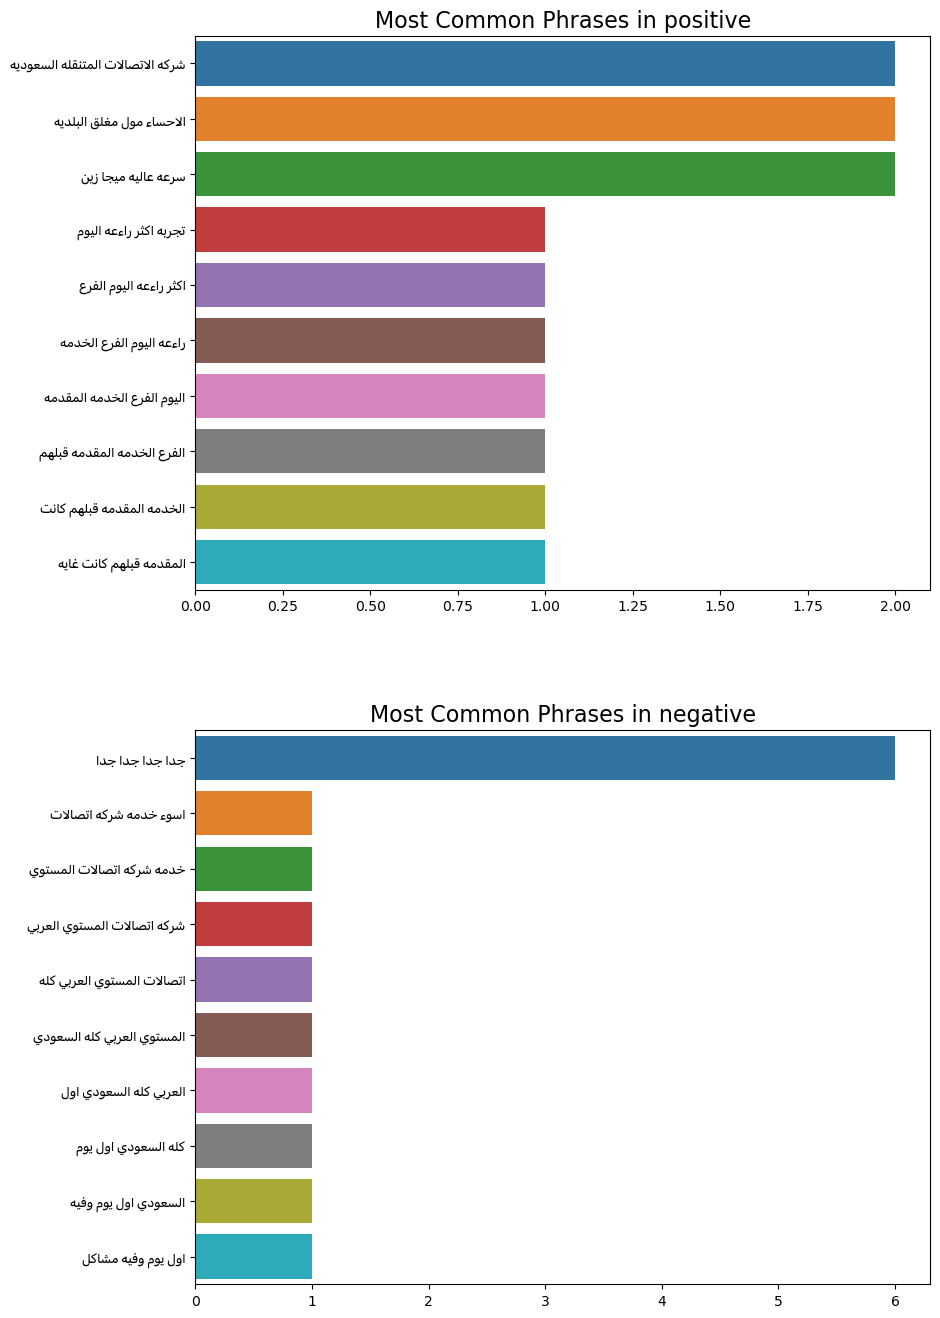

In [58]:
# Get the most common words by class for the 'sentiment' column
common_words = get_most_common_ngrams_by_class(df_for_tokenization,'Predicted_Labels' ,ngram_size=4, n=10)  # Adjust n as needed

# Plot the most common words
plot_most_common_ngrams(common_words)

## Using XAI

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step
Text: كان لي تجربه اكثر من راءعه اليوم في هذا الفرع و الخدمه المقدمه من قبلهم كانت في غايه الروعه الاستاذه ضي و الاستاذ حسين انتم قدوه لشباب الوطن الشغوف اتمناء لكم المزيد من التوفيق والنجاح و شكرا
Explanation: [('في', 0.4548623850776178), ('قبلهم', 0.27536898528291803), ('الاستاذه', 0.17457370250117496), ('تجربه', -0.17220146575405798), ('هذا', 0.1316299155124657), ('الاستاذ', 0.1215027770830012), ('انتم', -0.12091436349496808), ('ضي', -0.12033224304754375), ('الخدمه', -0.12000061346373453), ('قدوه', -0.10824310376803836), ('و', 0.10585447265432447), ('والنجاح', 0.09688549176639423), ('كانت', -0.08966995573927654), ('اكثر', -0.08535602142113738), ('لي', -0.07929024041349675)]


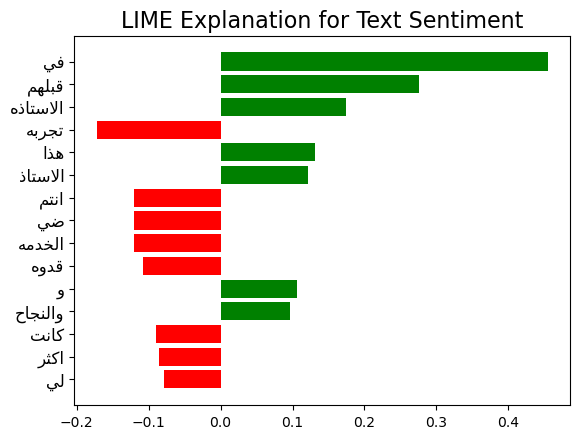

In [17]:
from lime.lime_text import LimeTextExplainer
import matplotlib.pyplot as plt
from collections import Counter
import arabic_reshaper
from bidi.algorithm import get_display
from nltk import ngrams
import seaborn as sns
import pandas as pd
# Explaining predictions using LIME
explainer = LimeTextExplainer(class_names=['Negative', 'Positive'])

def predict_proba(texts):
    # Convert texts to padded sequences
    seqs = tokenizer.texts_to_sequences(texts)
    padded_seqs = pad_sequences(seqs, maxlen=100)
    # Predict
    return LSTMmodel1.predict(padded_seqs)

# Pick a text to explain
text_to_explain = df['Reviews'][0]  # Change the index for different texts

# Generate explanation
exp = explainer.explain_instance(text_to_explain, predict_proba, num_features=15)
print('Text:', text_to_explain)
print('Explanation:', exp.as_list())

# Function to reshape and get display text for Arabic
def reshape_texts(texts):
    return [get_display(arabic_reshaper.reshape(text)) for text in texts]

fig, ax = plt.subplots()
vals = [x[1] for x in exp.as_list()]  # Assuming exp.as_list() gives you the list of features and their weights
names = [x[0] for x in exp.as_list()]  # Original names in Arabic
reshaped_names = reshape_texts(names)  # Reshape Arabic texts
vals.reverse()
reshaped_names.reverse()
colors = ['green' if x > 0 else 'red' for x in vals]
pos = range(len(exp.as_list()))
ax.barh(pos, vals, align='center', color=colors)
ax.set_yticks(pos)
ax.set_yticklabels(reshaped_names, fontdict={'fontsize': 12})  # Optionally adjust font size
ax.set_title('LIME Explanation for Text Sentiment', fontdict={'fontsize': 16})

plt.show()

